In [185]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [186]:
# Загружаем данные и смотрим, что они из себя представляют
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass'>

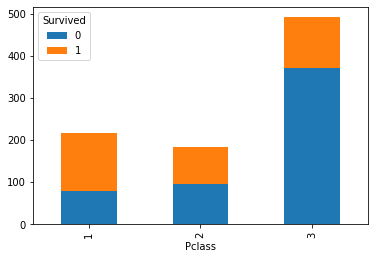

In [187]:
# Смотрим на зависимость социального статуса на вероятность спасения
df.pivot_table(values='PassengerId',index='Pclass',columns='Survived', aggfunc='count').plot(kind='bar', stacked=True)

<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

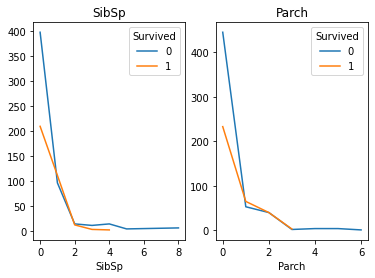

In [188]:
# Рассмотрим как кол-во родственников влияет на спасение
# Люди имевшие больше 1 родственника чаще всего не спасались
fig, axes = plt.subplots(ncols=2)
df.pivot_table(values='PassengerId', index=['SibSp'], columns='Survived', aggfunc='count') \
.plot(ax=axes[0],title='SibSp')
df.pivot_table(values='PassengerId', index=['Parch'], columns='Survived', aggfunc='count') \
.plot(ax=axes[1],title='Parch')


In [189]:
# Видим, что информация о номерах кают неполная
#(более того она "почти" отстуствует, ибо заполнено даже меньше четверти данных)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [190]:
# Также заметим, что информация о возрастах пассажиров тоже неполная (или лучше сказать почти полная)
# Значит надо заменить пустые значения медианным
df['Age'].fillna(df.Age.median(), inplace=True)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [192]:
# Также заметим, что в поле Embarked отсутствуют два значения
#(т.е. о двух пассижирах неизвестно, в каком порту он сели )
# Присвоим им порт, в котором село больше всего людей
MaxEmbarked = df.groupby('Embarked').count()['PassengerId']
df.Embarked[df.Embarked.isnull()] = MaxEmbarked[MaxEmbarked == MaxEmbarked.max()].index[0]


<ipython-input-192-6fe050f642f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Embarked.isnull()] = MaxEmbarked[MaxEmbarked == MaxEmbarked.max()].index[0]


In [193]:
# Эти поля носят более информативный характер и никак не помогут нам в предксказании
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [194]:
# Теперь надо привести все данные к числовому типу
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Кодирование пола 
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
# Кодирование Embarked
ohe = OneHotEncoder(sparse=False)
temp = pd.DataFrame(ohe.fit_transform(df['Embarked'].values.reshape(-1,1)))
df = df.drop('Embarked', axis=1)
df = pd.concat([df,temp], axis=1)





In [195]:
#Обработка входного файла
test = pd.read_csv('test.csv')
test.Age[test.Age.isnull()] = test.Age.mean() # заполняем пустые значения средним возрастом
test.Fare[test.Fare.isnull()] = test.Fare.median() #заполняем пустые значения средней ценой билета

MaxPassEmbarked = test.groupby('Embarked').count()['PassengerId']
test.Embarked[test.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

result = pd.DataFrame(test.PassengerId)

test = test.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)
test.Sex = le.fit_transform(test.Sex)

temp2 = pd.DataFrame(ohe.fit_transform(test['Embarked'].values.reshape(-1,1)))
test = test.drop('Embarked', axis=1)
test = pd.concat([test,temp2], axis=1)


<ipython-input-195-41a0c90a1627>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Age[test.Age.isnull()] = test.Age.mean() # заполняем пустые значения средним возрастом
<ipython-input-195-41a0c90a1627>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Fare[test.Fare.isnull()] = test.Fare.median() #заполняем пустые значения средней ценой билета
<ipython-input-195-41a0c90a1627>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te

In [196]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pylab as pl

In [197]:
# разделим обучающую выборку на показатель, который мы исследуем и признаки его определяющие
target = df.Survived
train = df.drop(['Survived'], axis=1)

kfold = 5 # кол-во подвыборок для валидации
itog_val = {} # Список для записи рез-татов кросс валидации разных алгоритмов

In [198]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0.0,0.0,1.0
887,1,0,19.0,0,0,30.0000,0.0,0.0,1.0
888,3,0,28.0,1,2,23.4500,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,1.0,0.0,0.0


> Теперь разобьем показатели полученные ранее на 2 подвыборки(обучающую и тестовую) для расчет ROC кривых (для кросс-валидации этого делать не надо, т.к. функция проверки это делает сама. В этом нам поможет функция train_test_split модуля cross_validation

### В качестве параметров ей передается:
<ol>
    <li>Массив параметров</li>
    <li>Массив значений показателей</li>
    <li>Соотношение в котором будет разбита обучающая выборка (в нашем случае для тестового набора будет выделена 1/4 часть данных исходной обучающей выборки)</li>
    <li></li>
</ol>




### На выходе функция выдает 4 массива:
<ol>
    <li>Новый обучающий массив параметров</li>
    <li>тестовый массив параметров</li>
    <li>Новый массив показателей</li>
    <li>тестовый массив показателей</li>
</ol>



In [199]:
ROCtrainTRN, ROCtestTRN, ROCtrainTRG, ROCtestTRG = train_test_split(train, target, test_size=0.25) 

In [200]:
# Далее представлены методы с наилучшими параметрами подобранные опытным путем:
model_rfc = RandomForestClassifier(n_estimators = 70) #в параметре передаем кол-во деревьев
model_knc = KNeighborsClassifier(n_neighbors = 18) #в параметре передаем кол-во соседей
model_lr = LogisticRegression(penalty='l1', tol=0.01, solver='liblinear') 
model_svc = svm.SVC() #по умолчанию kernek='rbf'

In [201]:
# Теперь проверим полученные модели с помощью кросс-валидации. 
# Для этого нам необходимо воcпользоваться функцией cross_val_score
scores = cross_val_score(model_rfc, train, target, cv = kfold)
itog_val['RandomForestClassifier'] = scores.mean()
scores = cross_val_score(model_knc, train, target, cv = kfold)
itog_val['KNeighborsClassifier'] = scores.mean()
scores = cross_val_score(model_lr, train, target, cv = kfold)
itog_val['LogisticRegression'] = scores.mean()
scores = cross_val_score(model_svc, train, target, cv = kfold)
itog_val['SVC'] = scores.mean()

<AxesSubplot:>

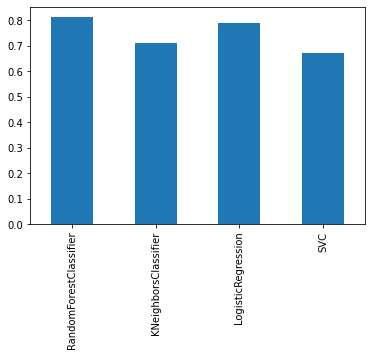

In [202]:
# Давайте посмотрим на графике средний показатель тестов перекрестной проверки каждой модели:
pd.DataFrame.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)
#Лучший рез-тат у rfc

<Figure size 432x288 with 0 Axes>

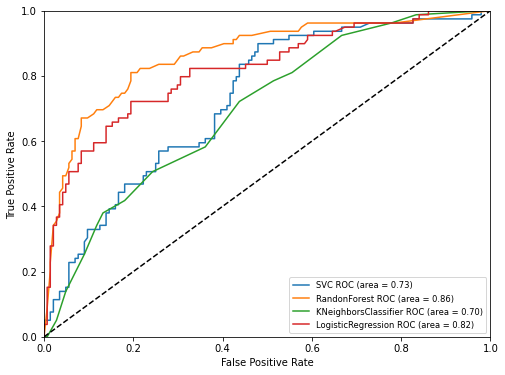

In [203]:
#Как можно увидеть из графика лучше всего себя показал алгоритм RandomForest. 
#Теперь же давайте взглянем на графики ROC-кривых, для оценки точности работы классификатора. 
pl.clf()
plt.figure(figsize=(8,6))
#SVC
model_svc.probability = True
probas = model_svc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:,1])
roc_auc = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('SVC', roc_auc))
#RandomForestClassifier
probas = model_rfc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandonForest',roc_auc))
#KNeighborsClassifier
probas = model_knc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))
#LogisticRegression
probas = model_lr.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))

pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()


In [204]:
# лучший рез-тат опять у rfc
model_rfc.fit(train, target)
result.insert(1, 'Survived', model_rfc.predict(test))
result.to_csv('result_test.csv', index=False)
